## Exercise 2 : Clustering Method
In this exercise we will explore how each clustering algorithm discussed in the class works.

### Import Library

Import the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
!pip install kneed
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score

### Load Dataset
The dataset that we will use is a **Property Dataset**. In this dataset there will be 11 features including: <br>
- Area Category,
- Luas Tanah (m2),
- Luas Bangunan (m2),
- Jumlah Kamar,
- Jumlah Kamar Mandi,
- Tingkat/Lantai,
- Harga Penawaran (dari Owner),
- Terjual/Belum,
- Arah Hadap Rumah,
- Posisi Rumah,
- Lebar Jalan Depan Rumah (ROW). <br>

You can get the dataset from **Elearn**

Load dataset

In [ ]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/sergiohalim/data_mining-/refs/heads/main/property_dataset.csv"
df = pd.read_csv(url)
df.head()


,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,NaN,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [ ]:
# describe data
df.describe()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai
count,307.000000,307.000000,307.000000,306.000000,306.000000
mean,226.908795,266.579805,4.276873,3.339869,1.856209
std,202.149571,213.501196,1.646412,1.632311,0.512702
min,14.000000,14.000000,1.000000,1.000000,1.000000
25%,96.000000,120.000000,3.000000,2.000000,2.000000
50%,162.000000,200.000000,4.000000,3.000000,2.000000
75%,286.000000,332.500000,5.000000,4.000000,2.000000
max,1561.000000,1200.000000,13.000000,13.000000,4.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area Category                  307 non-null    object 
 1   Nama Daerah                    307 non-null    object 
 2   Luas Tanah (m2)                307 non-null    float64
 3   Luas Bangunan (m2)             307 non-null    float64
 4   Jumlah Kamar                   307 non-null    float64
 5   Jumlah Kamar Mandi             306 non-null    float64
 6   Tingkat/Lantai                 306 non-null    float64
 7   Harga Penawaran (dari Owner)   307 non-null    object 
 8   Terjual/Belum                  307 non-null    object 
 9   Arah Hadap Rumah               225 non-null    object 
 10  Posisi Rumah                   192 non-null    object 
 11  Lebar Jalan Depan Rumah (ROW)  266 non-null    object 
dtypes: float64(5), object(7)
memory usage: 29.0+ KB


Data Preparation

1. Check if there are any missing values in the data.
2. Check the percentage of null values.
3. Perform label encoding.
4. Apply feature scaling to the data.

1.

In [ ]:
# Check for missing values
df.isnull().sum()

,0
Area Category,1
Nama Daerah,1
Luas Tanah (m2),1
Luas Bangunan (m2),1
Jumlah Kamar,1
Jumlah Kamar Mandi,2
Tingkat/Lantai,2
Harga Penawaran (dari Owner),1
Terjual/Belum,1
Arah Hadap Rumah,83


2.

In [ ]:
# Calculate the percentage of null values for each column
null_percentage = (df.isnull().sum() / len(df)) * 100
null_percentage

,0
Area Category,0.324675
Nama Daerah,0.324675
Luas Tanah (m2),0.324675
Luas Bangunan (m2),0.324675
Jumlah Kamar,0.324675
Jumlah Kamar Mandi,0.649351
Tingkat/Lantai,0.649351
Harga Penawaran (dari Owner),0.324675
Terjual/Belum,0.324675
Arah Hadap Rumah,26.948052


Since there are too many nulls but not up to 50%, it’s better to fill them in using SimpleImputer with the strategy set to 'most_frequent'

In [ ]:

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

df.head()


,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240.0,300.0,4.0,3.0,2.0,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [ ]:
df.isnull().sum()

,0
Area Category,0
Nama Daerah,0
Luas Tanah (m2),0
Luas Bangunan (m2),0
Jumlah Kamar,0
Jumlah Kamar Mandi,0
Tingkat/Lantai,0
Harga Penawaran (dari Owner),0
Terjual/Belum,0
Arah Hadap Rumah,0


Drop the column 'Nama Daerah' because all the values are different.

3.

In [ ]:

# Drop the column 'Nama Daerah'
df = df.drop('Nama Daerah', axis=1)
df.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,240.0,300.0,4.0,3.0,2.0,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [ ]:

from sklearn.preprocessing import LabelEncoder

In [ ]:

le = LabelEncoder()
df['Area Category'] = le.fit_transform(df['Area Category'])
df['Terjual/Belum'] = le.fit_transform(df['Terjual/Belum'])
df['Arah Hadap Rumah'] = le.fit_transform(df['Arah Hadap Rumah'])
df['Posisi Rumah'] = le.fit_transform(df['Posisi Rumah'])
df['Lebar Jalan Depan Rumah (ROW)'] = le.fit_transform(df['Lebar Jalan Depan Rumah (ROW)'])
df.head()


,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,3,240.0,300.0,4.0,3.0,2.0,3500000000,0,3,2,0
1,0,30.0,60.0,2.0,1.0,2.0,287799000,0,3,2,1
2,3,170.0,170.0,5.0,4.0,2.0,2699999999,0,1,0,0
3,2,187.0,250.0,5.0,5.0,2.0,3100000000,0,3,2,0
4,1,350.0,600.0,5.0,5.0,2.0,5000000000,0,0,2,0


To replace incorrect or invalid data in the column "Harga Penawaran (dari Owner)", do the following:

Replace empty values (" ") with "10500000000".

Replace values with commas like "10.500.000.000,00" with "10500000000".

In [ ]:

# Replace values with commas like "10.500.000.000,00" with "10500000000".

# Replace empty values with "10500000000"
df['Harga Penawaran (dari Owner)'] = df['Harga Penawaran (dari Owner)'].replace(' ', '10500000000')

# Replace values with commas with "10500000000"
df['Harga Penawaran (dari Owner)'] = df['Harga Penawaran (dari Owner)'].str.replace('.', '', regex=True).str.replace(',', '', regex=True)

# Convert the column to numeric, handling errors by coercing to NaN
df['Harga Penawaran (dari Owner)'] = pd.to_numeric(df['Harga Penawaran (dari Owner)'], errors='coerce')

# Fill NaN values with 10500000000
df['Harga Penawaran (dari Owner)'] = df['Harga Penawaran (dari Owner)'].fillna(10500000000)

check the data type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area Category                  308 non-null    int64  
 1   Luas Tanah (m2)                308 non-null    object 
 2   Luas Bangunan (m2)             308 non-null    object 
 3   Jumlah Kamar                   308 non-null    object 
 4   Jumlah Kamar Mandi             308 non-null    object 
 5   Tingkat/Lantai                 308 non-null    object 
 6   Harga Penawaran (dari Owner)   308 non-null    float64
 7   Terjual/Belum                  308 non-null    int64  
 8   Arah Hadap Rumah               308 non-null    int64  
 9   Posisi Rumah                   308 non-null    int64  
 10  Lebar Jalan Depan Rumah (ROW)  308 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 26.6+ KB


Change the data types from:

- float to int
- object to int

In [ ]:
df['Luas Tanah (m2)'] = df['Luas Tanah (m2)'].astype(int)
df['Luas Bangunan (m2)'] = df['Luas Bangunan (m2)'].astype(int)
df['Jumlah Kamar'] = df['Jumlah Kamar'].astype(int)
df['Jumlah Kamar Mandi'] = df['Jumlah Kamar Mandi'].astype(int)
df['Tingkat/Lantai '] = df['Tingkat/Lantai '].astype(int)
df['Harga Penawaran (dari Owner)'] = df['Harga Penawaran (dari Owner)'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Area Category                  308 non-null    int64
 1   Luas Tanah (m2)                308 non-null    int64
 2   Luas Bangunan (m2)             308 non-null    int64
 3   Jumlah Kamar                   308 non-null    int64
 4   Jumlah Kamar Mandi             308 non-null    int64
 5   Tingkat/Lantai                 308 non-null    int64
 6   Harga Penawaran (dari Owner)   308 non-null    int64
 7   Terjual/Belum                  308 non-null    int64
 8   Arah Hadap Rumah               308 non-null    int64
 9   Posisi Rumah                   308 non-null    int64
 10  Lebar Jalan Depan Rumah (ROW)  308 non-null    int64
dtypes: int64(11)
memory usage: 26.6 KB


4.

In [ ]:

sc = StandardScaler()

df[['Area Category','Luas Tanah (m2)','Luas Bangunan (m2)','Jumlah Kamar','Jumlah Kamar Mandi','Tingkat/Lantai ','Harga Penawaran (dari Owner)','Terjual/Belum','Arah Hadap Rumah','Posisi Rumah','Lebar Jalan Depan Rumah (ROW)']] = sc.fit_transform(df[['Area Category','Luas Tanah (m2)','Luas Bangunan (m2)','Jumlah Kamar','Jumlah Kamar Mandi','Tingkat/Lantai ','Harga Penawaran (dari Owner)','Terjual/Belum','Arah Hadap Rumah','Posisi Rumah','Lebar Jalan Depan Rumah (ROW)']])

df.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,1.004372,0.064760,0.156529,-0.168161,-0.207847,0.313723,0.0,0.0,0.839497,-0.188069,-0.825581
1,-1.677824,-0.977457,-0.971209,-1.386831,-1.438941,0.313723,0.0,0.0,0.839497,-0.188069,0.220834
2,1.004372,-0.282646,-0.454330,0.441174,0.407700,0.313723,0.0,0.0,-1.141845,-5.453988,-0.825581
3,0.110307,-0.198276,-0.078417,0.441174,1.023247,0.313723,0.0,0.0,0.839497,-0.188069,-0.825581
4,-0.783759,0.610683,1.566201,0.441174,1.023247,0.313723,0.0,0.0,-2.132516,-0.188069,-0.825581


## K-Means Clustering

Using the elbow method, determine the number of clusters to be formed.

Use the elbow range range(1, 11)

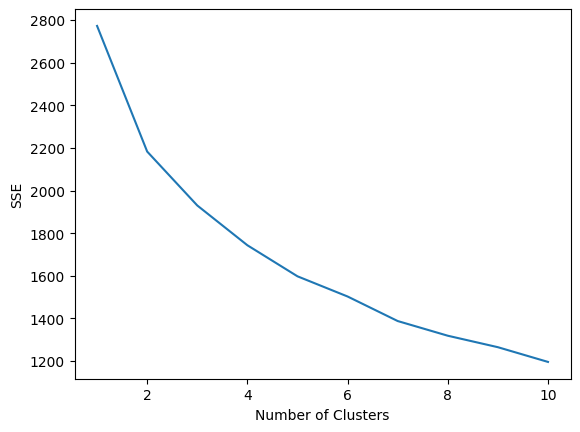

In [ ]:

# set the parameter for evaluating K
sse=[]
# check the inertia for each K
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

# manually visualize the elbow method using plotlib
plt.plot(range(1, 11), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()


In [ ]:
# using kneelocator to find the elbow/knee

kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
elbow = kl.elbow

print(f"the best k for your model is  {elbow}")

the best k for your model is  4


Train the K-Means model on the dataset with the number of clusters you have determined.

In [ ]:
kmeans = KMeans(n_clusters=bestk, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(df)

In [ ]:
y_pred

array([1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 0, 1, 1, 0, 0, 0,
       3, 1, 0, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 3, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 3, 1, 0, 0, 3, 0, 1, 1,
       0, 0, 1, 3, 1, 3, 0, 0, 1, 0, 3, 3, 1, 3, 1, 1, 0, 3, 1, 1, 3, 1,
       3, 1, 1, 3, 3, 3, 3, 1, 0, 2, 0, 3, 1, 3, 3, 1, 1, 1, 1, 3, 3, 1,
       1, 1, 3, 1, 1, 1, 1, 3, 2, 3, 3, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 0,
       3, 1, 3, 2, 1, 1, 1, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 2, 0, 0, 2,
       1, 1, 3, 1, 1, 1, 0, 1, 3, 1, 1, 0, 0, 0, 2, 0, 0, 3, 1, 2, 0, 3,
       1, 0, 0, 1, 0, 0, 3, 0, 1, 1, 1, 0, 0, 1, 3, 0, 0, 1, 2, 2, 3, 2,
       3, 2, 1, 2, 3, 2, 2, 2, 2, 3, 1, 0, 0, 0, 0, 3, 3, 1, 2, 3, 2, 3,
       1, 0, 3, 2, 1, 3, 2, 2, 0, 3, 1, 1, 3, 1, 3, 3, 3, 2, 1, 3, 0, 0,
       3, 3, 0, 3, 1, 1, 2, 1, 0, 2, 1, 0, 0, 3, 3, 0, 1, 3, 3, 3, 1, 3,
       3, 3, 2, 3, 3, 2, 3, 3, 3, 0, 3, 2, 3, 2, 0,

Display the cluster summary in the form of a dataframe:

1. For categorical columns: mode (use pd.Series.mode to find the mode; you do not need to use " " for this attribute).
2. For continuous columns: mean.
3. Cluster results: count.

In [ ]:


cluster_summary = pd.DataFrame()
for i in range(bestk):
  cluster_data = df[y_pred == i]
  cluster_summary_row = {}
  for column in ['Area Category', 'Terjual/Belum', 'Arah Hadap Rumah', 'Posisi Rumah', 'Lebar Jalan Depan Rumah (ROW)']:
    cluster_summary_row[column] = cluster_data[column].mode()[0]
  cluster_summary_row['KMeans'] = i
  cluster_summary_row['Count'] = len(cluster_data)

  cluster_summary = pd.concat([cluster_summary, pd.DataFrame([cluster_summary_row])], ignore_index=True)
cluster_summary

,Area Category,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),KMeans,Count
0,1.004372,0.0,0.839497,-0.188069,-0.825581,0,88
1,1.004372,0.0,0.839497,-0.188069,-0.825581,1,96
2,-0.783759,0.0,0.839497,-0.188069,1.267250,2,44
3,-0.783759,0.0,0.839497,-0.188069,1.267250,3,80


In [ ]:


continuous_summary = grouped[['Luas Tanah (m2)', 'Luas Bangunan (m2)', 'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Tingkat/Lantai ', 'Harga Penawaran (dari Owner)']].mean()
continuous_summary

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner)
KMeans,,,,,,
0,-0.645899,-0.773215,-1.026769,-0.977281,-0.649854,0.0
1,-0.065310,0.027064,0.333271,0.311521,0.354805,0.0
2,1.799645,1.874620,1.313631,1.303041,0.313723,0.0
3,-0.200943,-0.212982,0.007023,-0.015489,0.116526,0.0


In [ ]:

cluster_summary = pd.DataFrame({'KMeans': cluster_counts.index, 'Count': cluster_counts.values})
cluster_summary

,KMeans,Count
0,1,96
1,0,88
2,3,80
3,2,44


,Area Category,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
KMeans,,,,,
0,2,1,3,2,2
1,1,1,3,2,3
2,3,1,3,2,2


,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner)
KMeans,,,,,,
0,187.378205,243.814103,4.634615,3.673077,2.019231,3.544236e+09
1,570.680000,642.220000,6.260000,5.300000,1.980000,1.675630e+10
2,118.980392,117.588235,2.754902,1.862745,1.500000,1.506754e+09


,KMeans
KMeans,
0,156
1,50
2,102


## Hierarchical Clustering
Hierarchical clustering uses the agglomerative method.

Plot the dendrogram to help determine the number of clusters, using the 'max' method.

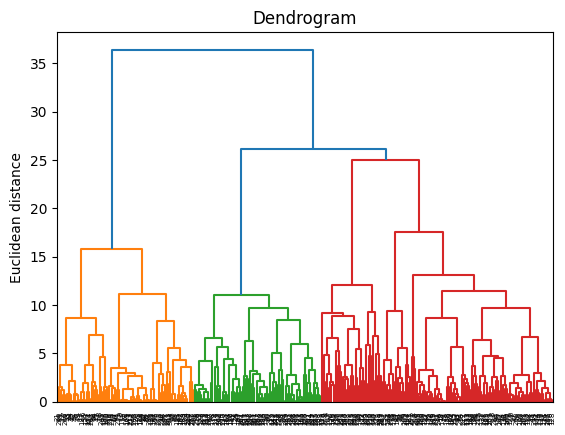

In [ ]:

# Calculate the linkage matrix
linkage_matrix = linkage(df, method='ward')

# Plot the dendrogram
dendrogram(linkage_matrix)
plt.title('Dendrogram')

plt.ylabel('Euclidean distance')
plt.show()


n_clusters = 3

# Apply hierarchical clustering with the chosen number of clusters
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
y_pred_hierarchical = hierarchical_clustering.fit_predict(df)

# ... (Rest of your code) ...

Perform hierarchical clustering with the Euclidean distance metric and set the number of clusters equal to the number of clusters from the K-Means model.

In [119]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, metric='euclidean', linkage='complete')
y_hc = hc.fit_predict(df)
y_hc

array([1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1,

Display the cluster summary in the form of a dataframe with the same criteria as the previous summary

In [120]:

cluster_summary_hc = pd.DataFrame()
for i in range(n_clusters):
  cluster_data = df[y_pred_hierarchical == i]
  cluster_summary_row = {}
  for column in ['Area Category', 'Terjual/Belum', 'Arah Hadap Rumah', 'Posisi Rumah', 'Lebar Jalan Depan Rumah (ROW)']:
    cluster_summary_row[column] = cluster_data[column].mode()[0]
  cluster_summary_row['Hierarchical'] = i
  cluster_summary_row['Count'] = len(cluster_data)

  cluster_summary_hc = pd.concat([cluster_summary_hc, pd.DataFrame([cluster_summary_row])], ignore_index=True)

grouped = df.groupby(y_pred_hierarchical)
continuous_summary_hc = grouped[['Luas Tanah (m2)', 'Luas Bangunan (m2)', 'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Tingkat/Lantai ', 'Harga Penawaran (dari Owner)']].mean()

cluster_summary_hc = pd.merge(cluster_summary_hc, continuous_summary_hc, left_on='Hierarchical', right_index=True)
cluster_summary_hc

,Area Category,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Hierarchical,Count,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner)
0,-0.783759,0.0,0.839497,-0.188069,-0.825581,0,144,0.405858,0.520335,0.585045,0.582960,0.368499,0.0
1,1.004372,0.0,0.839497,-0.188069,-0.825581,1,85,-0.632620,-0.771920,-1.021230,-0.982712,-0.707062,0.0
2,-0.783759,0.0,0.839497,-0.188069,1.267250,2,79,-0.059125,-0.117911,0.032380,-0.005262,0.089068,0.0


In [121]:
continuous_summary_hc

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner)
0,0.405858,0.520335,0.585045,0.582960,0.368499,0.0
1,-0.632620,-0.771920,-1.021230,-0.982712,-0.707062,0.0
2,-0.059125,-0.117911,0.032380,-0.005262,0.089068,0.0


In [122]:
cluster_counts = grouped.size().rename('Count')
cluster_counts


,Count
0,144
1,85
2,79


**Hierarchical Visualization**

Single Linkage

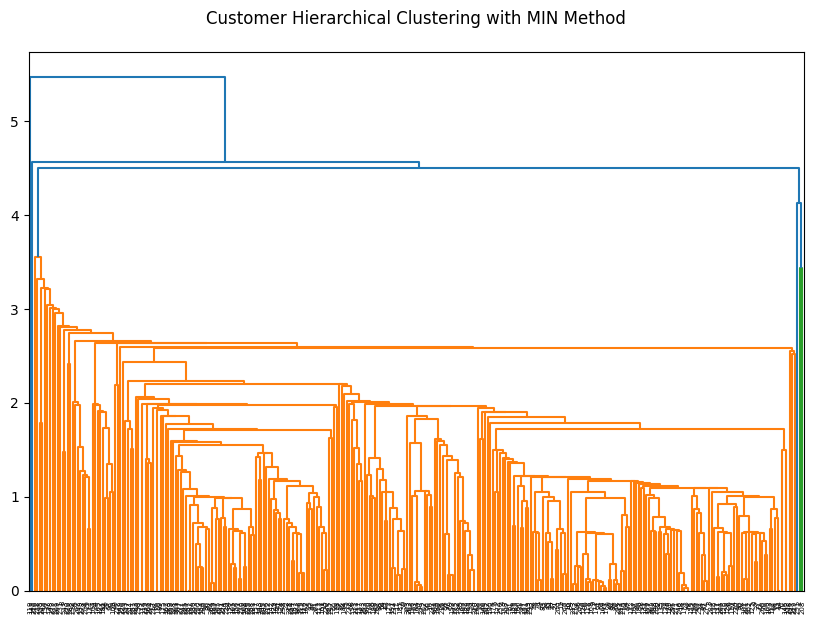

In [125]:
import scipy.cluster.hierarchy as hie

plt.figure(figsize=(10,7))
plt.title("Customer Hierarchical Clustering with MIN Method", pad=20)
dendro = hie.dendrogram(hie.linkage(df, method="single"))

complete linkage

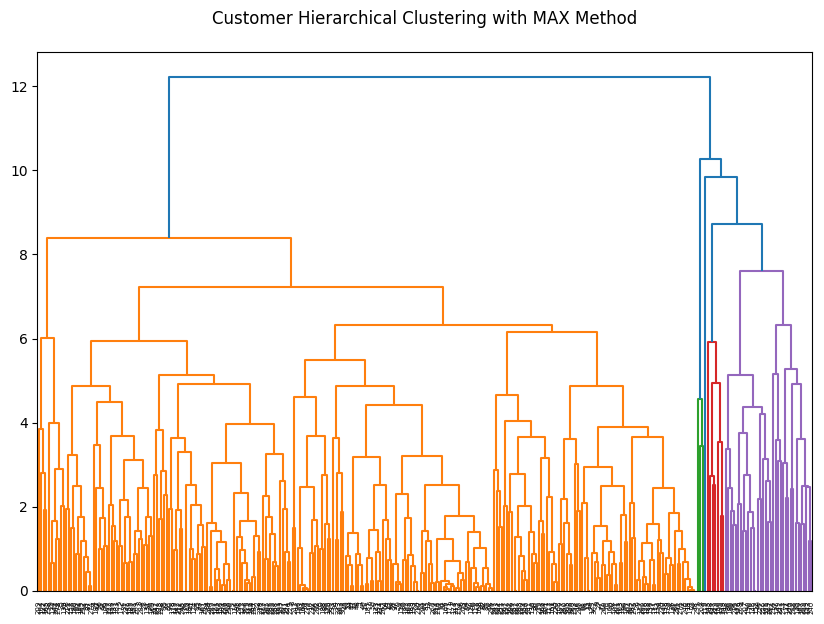

In [127]:

plt.figure(figsize=(10,7))
plt.title("Customer Hierarchical Clustering with MAX Method", pad=20)
dendro = hie.dendrogram(hie.linkage(df, method="complete"))

average linkage

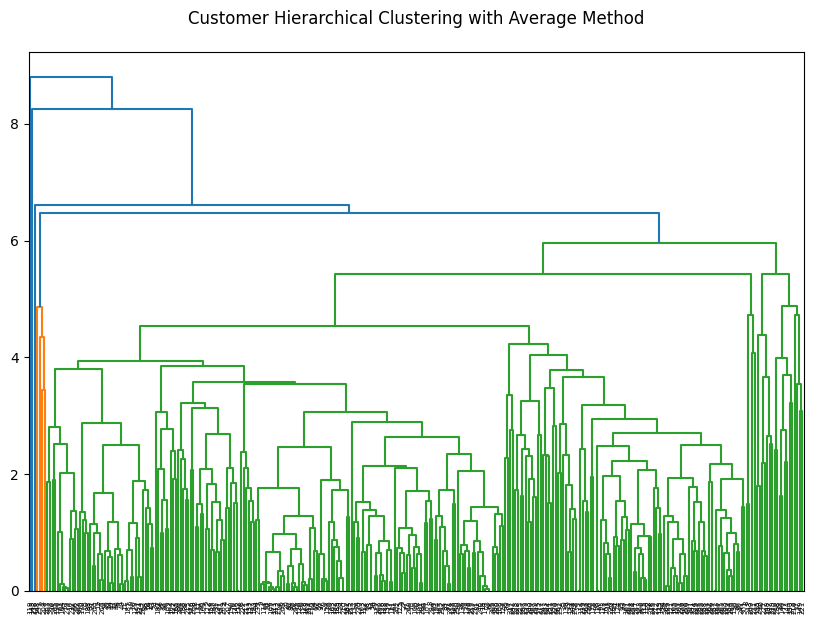

In [130]:

plt.figure(figsize=(10,7))
plt.title("Customer Hierarchical Clustering with Average Method", pad=20)
dendro = hie.dendrogram(hie.linkage(df, method="average"))

ward linkage

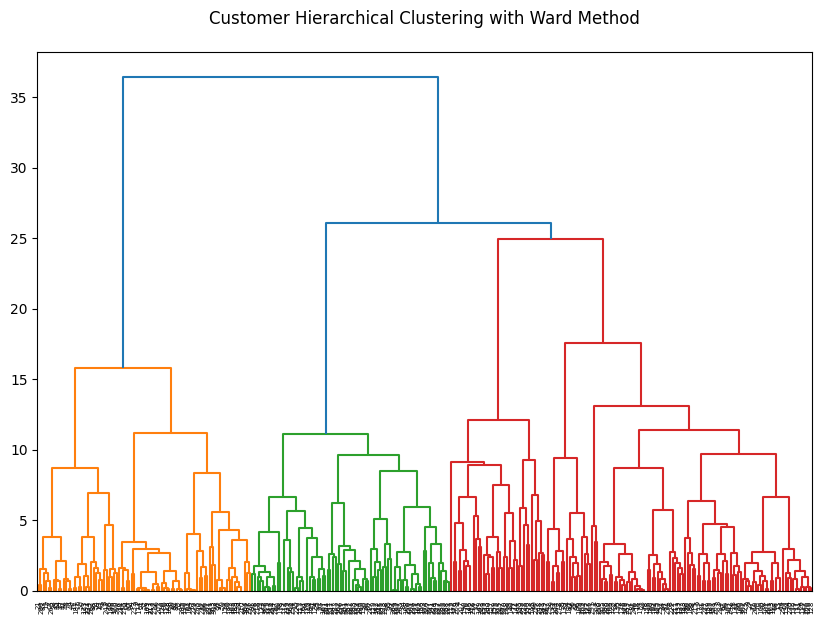

In [129]:

plt.figure(figsize=(10,7))
plt.title("Customer Hierarchical Clustering with Ward Method", pad=20)
dendro = hie.dendrogram(hie.linkage(df, method="ward"))